In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\PC\Downloads\churn analysis.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [10]:
df['Churn'] = df['Churn'].astype(str)  # Ensure Churn is treated as categorical

def plot_distribution(col, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue='Churn', palette='coolwarm')
    plt.title(title)
    plt.show()

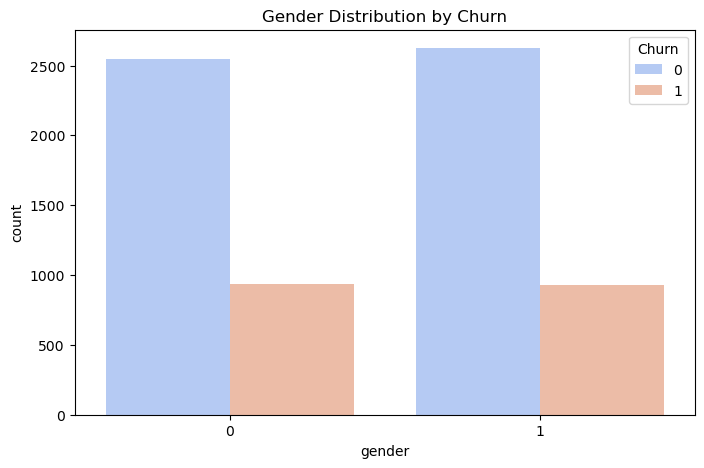

In [11]:
plot_distribution('gender', "Gender Distribution by Churn")

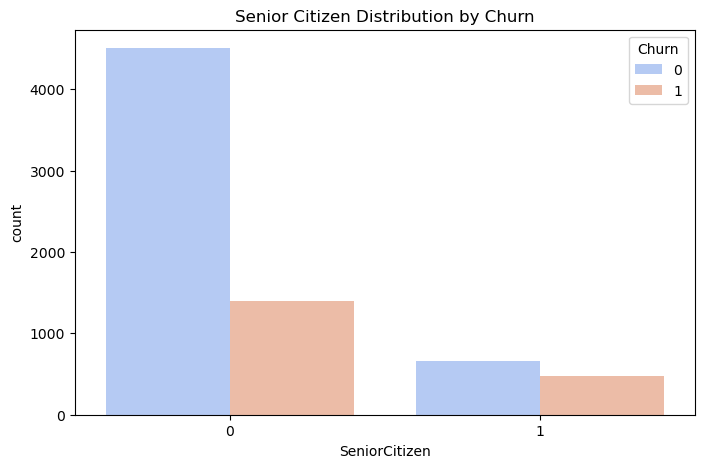

In [12]:
plot_distribution('SeniorCitizen', "Senior Citizen Distribution by Churn")

C:\Users\PC\AppData\Local\Temp\ipykernel_7852\3637090340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


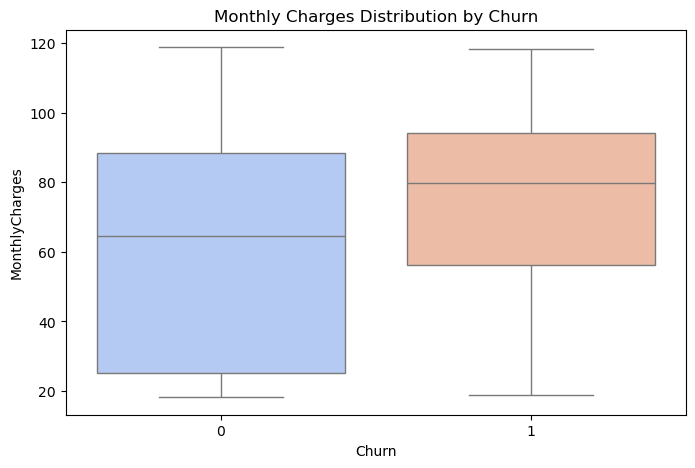

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title("Monthly Charges Distribution by Churn")
plt.show()

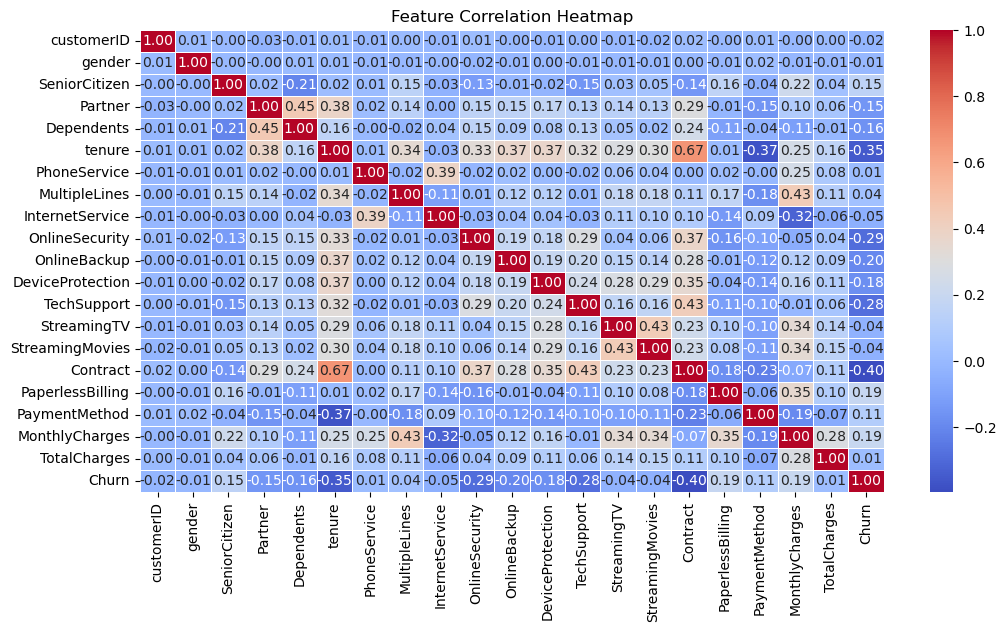

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

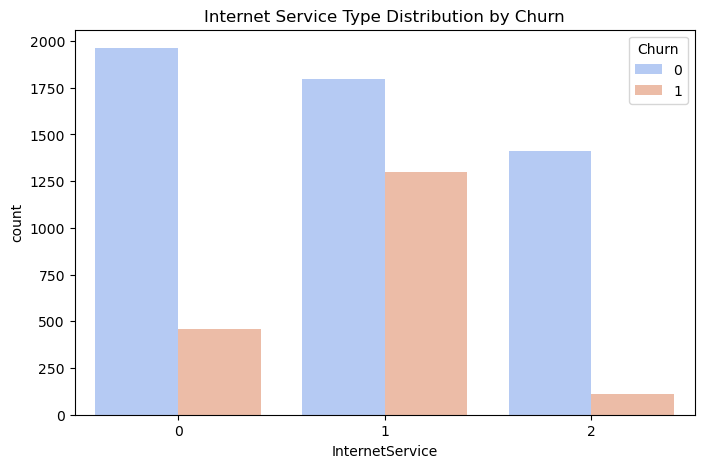

In [15]:
plot_distribution('InternetService', "Internet Service Type Distribution by Churn")

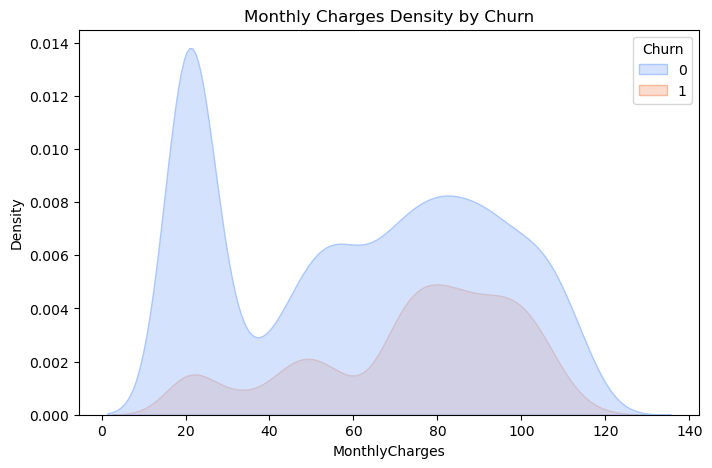

In [16]:
def plot_kde(col, title):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, palette='coolwarm', alpha=0.5)
    plt.title(title)
    plt.show()

plot_kde('MonthlyCharges', "Monthly Charges Density by Churn")

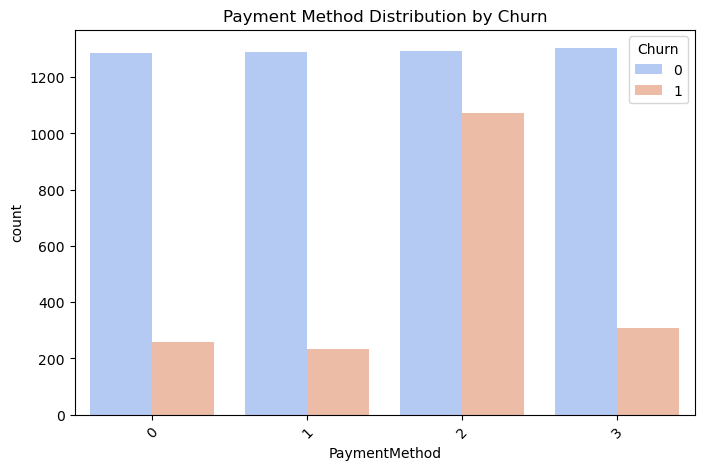

In [17]:
def plot_count(col, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_count('PaymentMethod', "Payment Method Distribution by Churn")

In [19]:
df.drop("customerID" , axis=1, inplace=True)

In [20]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [21]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [22]:
x=df.drop('Churn',axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [23]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: object

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [26]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [27]:
y_pred=model_dt.predict(x_test)
y_pred

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [28]:
model_dt.score(x_test,y_test)

0.7970191625266146

In [29]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1048
           1       0.67      0.42      0.51       361

   micro avg       0.80      0.80      0.80      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.78      0.80      0.78      1409



In [30]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [31]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [32]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [33]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9271803556308214
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       534
           1       0.92      0.96      0.93       647

    accuracy                           0.93      1181
   macro avg       0.93      0.92      0.93      1181
weighted avg       0.93      0.93      0.93      1181



In [34]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[477  57]
 [ 29 618]]


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [37]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [38]:
y_pred=model_rf.predict(x_test)

In [39]:
model_rf.score(x_test,y_test)

0.8069552874378992

In [40]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1048
           1       0.67      0.49      0.57       361

   micro avg       0.81      0.81      0.81      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



In [41]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x, y)

In [42]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [43]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [44]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [45]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [47]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [49]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9316666666666666
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       538
           1       0.91      0.97      0.94       662

    accuracy                           0.93      1200
   macro avg       0.94      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200



In [52]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[478  60]
 [ 22 640]]


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=50)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lr=LogisticRegression(solver='liblinear',max_iter=500)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [57]:
predict=lr.predict(x_test)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,466,42
Actual Yes,91,106


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       508
           1       0.72      0.54      0.61       197

    accuracy                           0.81       705
   macro avg       0.78      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705



In [60]:
import pickle

In [61]:
filename = 'model.sav'

In [63]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [66]:
load_model = pickle.load(open(filename, 'rb'))

In [67]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [68]:
model_score_r1

0.9316666666666666

In [69]:
import pickle
filename = 'model.sav'
pickle.dump(model_rf_smote, open(filename, 'wb'))


In [72]:
import gradio as gr
import pickle
import pandas as pd


model = pickle.load(open('model.sav', 'rb'))


gender_map = {'Female': 0, 'Male': 1}
yes_no_map = {'No': 0, 'Yes': 1}
multiple_lines_map = {'No': 0, 'No phone service': 1, 'Yes': 2}
internet_service_map = {'DSL': 0, 'Fiber optic': 1, 'No': 2}
online_security_map = {'No': 0, 'Yes': 1, 'No internet service': 2}
online_backup_map = {'No': 0, 'Yes': 1, 'No internet service': 2}
device_protection_map = {'No': 0, 'Yes': 1, 'No internet service': 2}
tech_support_map = {'No': 0, 'Yes': 1, 'No internet service': 2}
streaming_tv_map = {'No': 0, 'Yes': 1, 'No internet service': 2}
streaming_movies_map = {'No': 0, 'Yes': 1, 'No internet service': 2}
contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
payment_method_map = {
    'Bank transfer (automatic)': 0,
    'Credit card (automatic)': 1,
    'Electronic check': 2,
    'Mailed check': 3
}


def predict_churn(gender, senior_citizen, partner, dependents, tenure, phone_service,
                  multiple_lines, internet_service, online_security, online_backup,
                  device_protection, tech_support, streaming_tv, streaming_movies,
                  contract, paperless_billing, payment_method, monthly_charges, total_charges):

    input_data = pd.DataFrame({
        'gender': [gender_map[gender]],
        'SeniorCitizen': [yes_no_map[senior_citizen]],
        'Partner': [yes_no_map[partner]],
        'Dependents': [yes_no_map[dependents]],
        'tenure': [tenure],
        'PhoneService': [yes_no_map[phone_service]],
        'MultipleLines': [multiple_lines_map[multiple_lines]],
        'InternetService': [internet_service_map[internet_service]],
        'OnlineSecurity': [online_security_map[online_security]],
        'OnlineBackup': [online_backup_map[online_backup]],
        'DeviceProtection': [device_protection_map[device_protection]],
        'TechSupport': [tech_support_map[tech_support]],
        'StreamingTV': [streaming_tv_map[streaming_tv]],
        'StreamingMovies': [streaming_movies_map[streaming_movies]],
        'Contract': [contract_map[contract]],
        'PaperlessBilling': [yes_no_map[paperless_billing]],
        'PaymentMethod': [payment_method_map[payment_method]],
        'MonthlyCharges': [monthly_charges],
        'TotalCharges': [total_charges]
    })

    prediction = model.predict(input_data)[0]

    if prediction == '1':
        return "🚨 Customer is LIKELY to CHURN."
    else:
        return "✅ Customer is likely to STAY."


with gr.Blocks() as demo:
    gr.Markdown("## 📊 Customer Churn Prediction App")
    gr.Markdown("Fill out customer details below:")

    with gr.Row():
        gender = gr.Dropdown(choices=["Female", "Male"], label="Gender")
        senior_citizen = gr.Dropdown(choices=["No", "Yes"], label="Senior Citizen")
        partner = gr.Dropdown(choices=["No", "Yes"], label="Has Partner?")
        dependents = gr.Dropdown(choices=["No", "Yes"], label="Has Dependents?")
    
    with gr.Row():
        tenure = gr.Slider(0, 72, value=12, step=1, label="Tenure (Months)")
        monthly_charges = gr.Number(label="Monthly Charges ($)", value=70)
        total_charges = gr.Number(label="Total Charges ($)", value=2500)

    with gr.Row():
        phone_service = gr.Dropdown(choices=["No", "Yes"], label="Phone Service")
        multiple_lines = gr.Dropdown(choices=["No", "No phone service", "Yes"], label="Multiple Lines")
        internet_service = gr.Dropdown(choices=["DSL", "Fiber optic", "No"], label="Internet Service")

    with gr.Row():
        online_security = gr.Dropdown(choices=["No", "Yes", "No internet service"], label="Online Security")
        online_backup = gr.Dropdown(choices=["No", "Yes", "No internet service"], label="Online Backup")
        device_protection = gr.Dropdown(choices=["No", "Yes", "No internet service"], label="Device Protection")

    with gr.Row():
        tech_support = gr.Dropdown(choices=["No", "Yes", "No internet service"], label="Tech Support")
        streaming_tv = gr.Dropdown(choices=["No", "Yes", "No internet service"], label="Streaming TV")
        streaming_movies = gr.Dropdown(choices=["No", "Yes", "No internet service"], label="Streaming Movies")

    with gr.Row():
        contract = gr.Dropdown(choices=["Month-to-month", "One year", "Two year"], label="Contract Type")
        paperless_billing = gr.Dropdown(choices=["No", "Yes"], label="Paperless Billing?")
        payment_method = gr.Dropdown(choices=[
            "Bank transfer (automatic)", "Credit card (automatic)",
            "Electronic check", "Mailed check"
        ], label="Payment Method")

    submit_btn = gr.Button("🔮 Predict Churn")
    output = gr.Textbox(label="Prediction Result")

    submit_btn.click(
        predict_churn,
        inputs=[gender, senior_citizen, partner, dependents, tenure, phone_service,
                multiple_lines, internet_service, online_security, online_backup,
                device_protection, tech_support, streaming_tv, streaming_movies,
                contract, paperless_billing, payment_method, monthly_charges, total_charges],
        outputs=output
    )

demo.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
